# Webscraping mit Python: Deutsche Meister beim Fussball

In [32]:
#Relevante Bibliotheken laden
import requests
from bs4 import BeautifulSoup


#Mit request die Website laden, auf der Webscraping angewendet werden soll 
response=requests.get("https://www.sport.de/fussball/deutschland-bundesliga/historie-siegerliste/")

#Mit Beautifulsoup die html "parsen"
soup=BeautifulSoup(response.text,"html.parser")

# print(soup.prettify) -> Der Output ist zu lang. Das sollte für eine bessere Struktur noch angewedet werden 


In [33]:
#Auf alle img Tags zurückgreifen

alle_images=soup.findAll("img")

for img in alle_images:
    title=img.get("alt")
    print(title)
    

sport.de Logo
Wettanbieter
Bundesliga
FC Bayern München
Bayer Leverkusen
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
FC Bayern München
Borussia Dortmund
Borussia Dortmund
FC Bayern München
VfL Wolfsburg
FC Bayern München
VfB Stuttgart
FC Bayern München
FC Bayern München
SV Werder Bremen
FC Bayern München
Borussia Dortmund
FC Bayern München
FC Bayern München
FC Bayern München
1. FC Kaiserslautern
FC Bayern München
Borussia Dortmund
Borussia Dortmund
FC Bayern München
SV Werder Bremen
VfB Stuttgart
1. FC Kaiserslautern
FC Bayern München
FC Bayern München
SV Werder Bremen
FC Bayern München
FC Bayern München
FC Bayern München
VfB Stuttgart
Hamburger SV
Hamburger SV
FC Bayern München
FC Bayern München
Hamburger SV
1. FC Köln
Bor. Mönchengladbach
Bor. Mönchengladbach
Bor. Mönchengladbach
FC Bayern München
FC Bayern München
FC Bayern München
Bor. Mönchengladb

In [34]:
#Es sind ein paar irrelevante Begriffe vorhanden. Diese sollten aus den Ergebnissen gefiltert werden.

irrelevante_titel = [
    "sport.de Logo",
    "Bundesliga",
    "2. Bundesliga",
    "3. Liga",
    "Wettanbieter",
    "LaLiga",
    "Serie A",
    "Fußball-WM",
    'DFB-Pokal', 
    'Freundschaft Vereine (Fußball|m)', 
    'EM', 
    'Premier League', 
    'SüperLig', 
    'Freundschaft Vereine (Fußball|m)', 
    'MLS', 
    'Premier League'
]

gefilterte_titel = []

for img in alle_images:
    title = img.get('title')
    if title not in irrelevante_titel:
        gefilterte_titel.append(title)

#Ergebnisse herausgeben
print(gefilterte_titel)

from collections import Counter

titel_haeufigkeit = Counter(gefilterte_titel)


print(titel_haeufigkeit)

[None, 'FC Bayern München', 'Bayer Leverkusen', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'Borussia Dortmund', 'Borussia Dortmund', 'FC Bayern München', 'VfL Wolfsburg', 'FC Bayern München', 'VfB Stuttgart', 'FC Bayern München', 'FC Bayern München', 'SV Werder Bremen', 'FC Bayern München', 'Borussia Dortmund', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', '1. FC Kaiserslautern', 'FC Bayern München', 'Borussia Dortmund', 'Borussia Dortmund', 'FC Bayern München', 'SV Werder Bremen', 'VfB Stuttgart', '1. FC Kaiserslautern', 'FC Bayern München', 'FC Bayern München', 'SV Werder Bremen', 'FC Bayern München', 'FC Bayern München', 'FC Bayern München', 'VfB Stuttgart', 'Hamburger SV', 'Hamburger SV', 'FC Bayern München', 'FC Bayern München', 'Hamburger SV', '1. FC Köln', 'Bor. Mönchengladbach

C:\Users\goex1\AppData\Local\Temp\ipykernel_13848\2864073138.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anzahl, y=titel, palette="viridis")
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\goex1\AppD

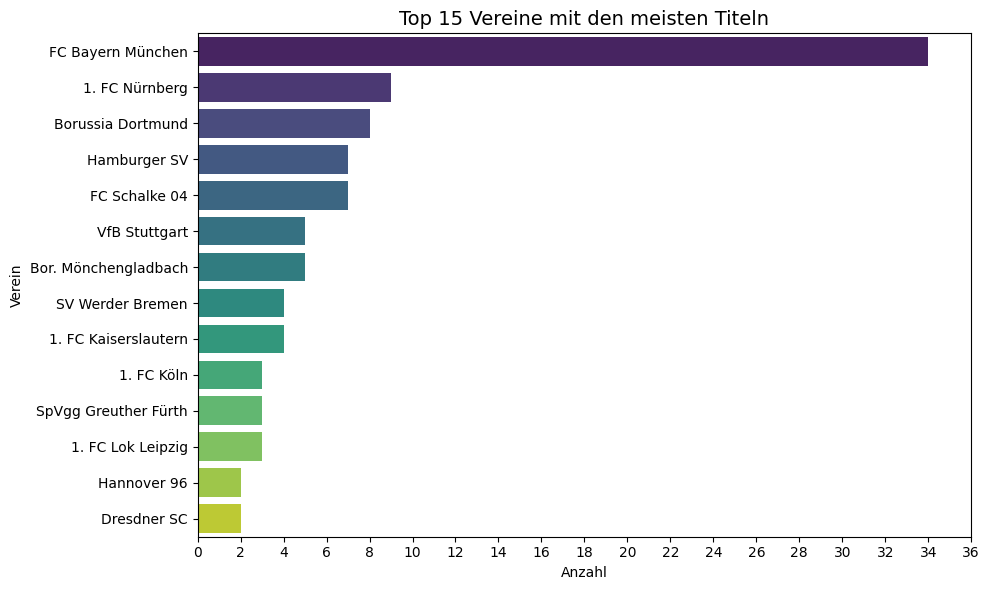

In [35]:
#Ergebnisse mit Seaborn und matplotlib grafisch darstellen

import seaborn as sns 
import matplotlib.pyplot as plt
from collections import Counter


# Titelhäufigkeit berechnen
titel_haeufigkeit = Counter(gefilterte_titel)

# 15 Vereine mit den häufigsten Titeln extrahieren
top_n = 15
häufigste_titel = titel_haeufigkeit.most_common(top_n)

# In zwei Listen aufteilen für Plot
titel, anzahl = zip(*häufigste_titel)

# Seaborn-Plot erstellen
plt.figure(figsize=(10, 6))
sns.barplot(x=anzahl, y=titel, palette="viridis")

plt.title(f"Top {top_n} Vereine mit den meisten Titeln", fontsize=14)
plt.xlabel("Anzahl")
plt.xticks(range(0,37,2))
plt.ylabel("Verein")
plt.tight_layout()
plt.show()